In [31]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib 
%config InlineBackend.figure_format = 'retina'
import random
import os
import seaborn as sns
#import lal
from scipy.interpolate import interp1d
#sns.set(rc={'figure.figsize':(11.7,8.27)})

from scipy.stats import beta
from scipy.stats import lognorm

import matplotlib.mlab as mlab

cp=sns.color_palette('Dark2', 20)
#sns.set_context('notebook')
#sns.set(style="white", palette="muted")
from scipy import stats
import get_wavelet_params as wp
from matplotlib import rc

rc('text', usetex=True)

# Plot parameters
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams['axes.labelsize'] = 24
matplotlib.rcParams['xtick.labelsize'] = 30
matplotlib.rcParams['ytick.labelsize'] = 30
matplotlib.rcParams['xtick.major.size'] = 20
matplotlib.rcParams['ytick.major.size'] = 20
matplotlib.rcParams['xtick.top'] = True
matplotlib.rcParams['xtick.direction'] = 'in'
matplotlib.rcParams['xtick.minor.visible'] = True
matplotlib.rcParams['xtick.minor.size'] = 10
matplotlib.rcParams['ytick.minor.size'] = 10
matplotlib.rcParams['legend.fontsize'] = 18
matplotlib.rcParams['legend.frameon'] = True
matplotlib.rcParams['lines.linewidth'] = 3

[-0.0187016 -0.0190167 -0.0192995 ... -0.0172635 -0.0178109 -0.0183373]
[-3.25585e-04 -4.58829e-04 -6.21362e-04 ... -3.03470e-05 -1.50867e-04
 -2.06926e-04]


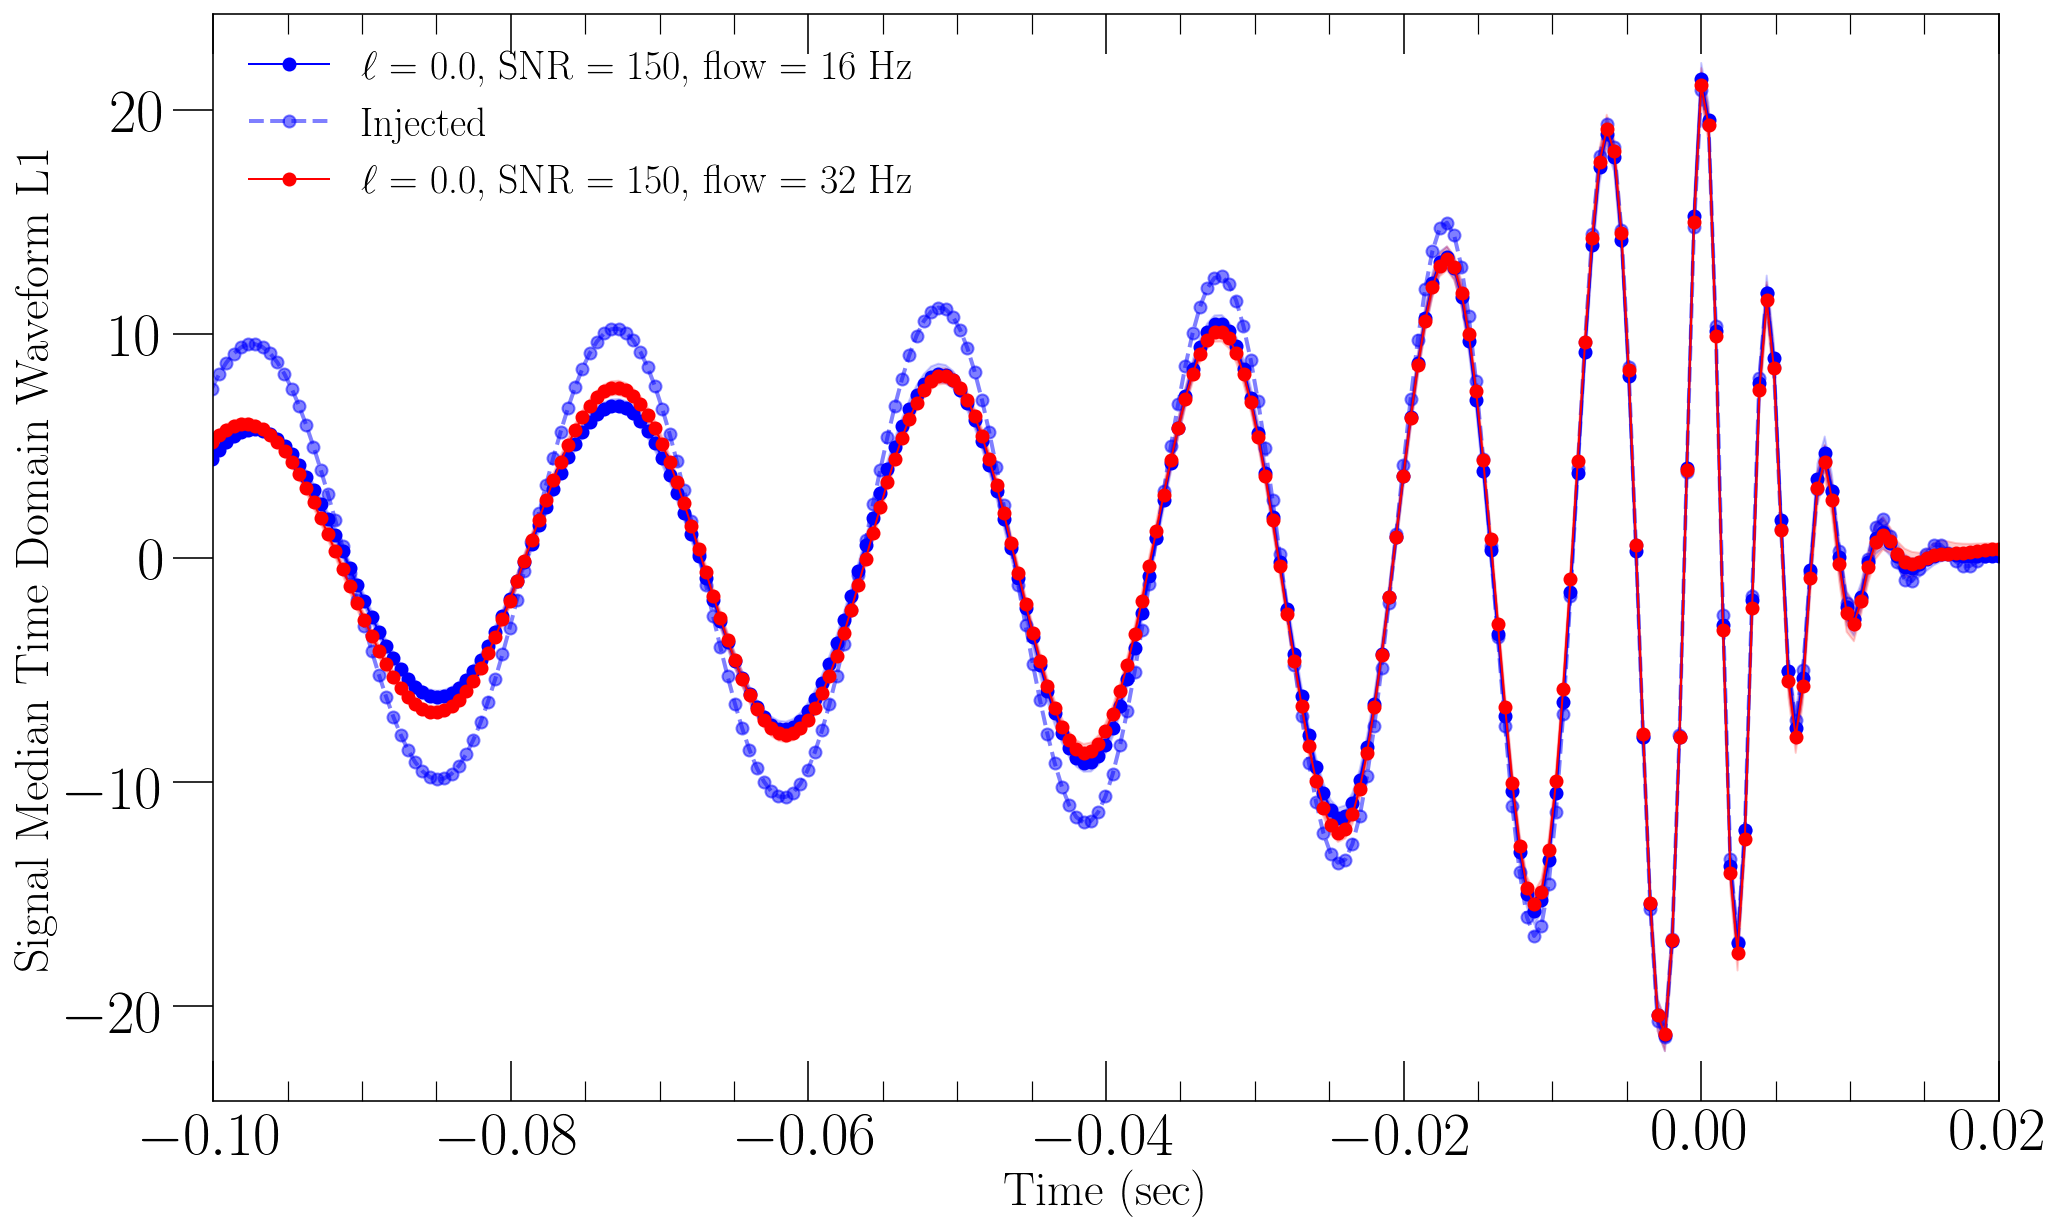

In [33]:
def GetPeakTime(time, data): 
    """ Grab the peak time of some data """
    t_peak = time[np.argmax(data)]
    return t_peak

def SubtractPeakTime(time, data): 
    """ Subtract the peak time of some data """
    t_peak = GetPeakTime(time, data)
    return time - t_peak

def GetMedianData(ell, SNR, FLOW = True):
    """ Given a coupling constant value and an SNR, return the columns of the median waveform data """
    
    ell = str(ell).replace('.','p')
    SNR = str(SNR)
    
    base_dir = "/home/maria.okounkova/public_html/dCS_" + ell + "_SNR_" + SNR \
               + "/trigtime_1197495364.000000000_0.0_0.0_0/post/signal/"
    if FLOW:
        base_dir = "/home/maria.okounkova/public_html/dCS_" + ell + "_SNR_" + SNR + "_FLOW" \
               + "/trigtime_1197495364.000000000_0.0_0.0_0/post/signal/"
        
    
    ## Grab Livingston data
    f = base_dir + "signal_median_time_domain_waveform_L1.dat"
    time, d1, d2, d3, d4, d5 = np.loadtxt(f, comments="#",usecols=([0,1,2,3,4,5]),unpack=True)
    
    ## Subtract peak time
    print(d1)
    time = SubtractPeakTime(time, d1)
    
    return time, d1, d2, d3, d4, d5


def GetInjectedData(ell, SNR):
    
    ell = str(ell).replace('.','p')
    SNR = str(SNR)
    f = "/home/maria.okounkova/BeyondGRAnalysis/Waveforms/dCS_" + ell + "/" \
               + "hwinjcbc_1197495358_dCS_" + ell + "_SNR_" + SNR + "_L1.txt"
    data = np.loadtxt(f, comments="#",usecols=([0]),unpack=True)
    s_rate = 2048 # Hz
    dt = 1.0/s_rate
    time = np.array([dt * t for t in range(len(data))])
    
    time = SubtractPeakTime(time, data)
    return time, data
    
def PlotMedianData(ell, SNR, c, FLOW=False):
    
    ## Plot the Bayeswave data
    time, d1, d2, d3, d4, d5 = GetMedianData(ell, SNR, FLOW=FLOW)
    label = r'$\ell$ = ' + str(ell) + ', SNR = ' + str(SNR) + ', flow = 16 Hz'
    
    if FLOW:
        label = r'$\ell$ = ' + str(ell) + ', SNR = ' + str(SNR) + ', flow = 32 Hz'
    
    plt.plot(time, d1, '-o', lw = 1.0, alpha = 1.0, c=c, label=label)  
    plt.fill_between(time, d2, d3, alpha = 0.3, color=c, edgecolor=None)
    plt.fill_between(time, d4, d5, alpha = 0.2, color=c, edgecolor=None)
    
    ## Plot the injected data
    if not FLOW:
        time, data = GetInjectedData(ell, SNR)
        factor = np.max(np.abs(data))/np.max(np.abs(d1))
        plt.plot(time, data/factor, '--o', color=c, lw = 2.0, alpha=0.5, label='Injected')
        
plt.figure(figsize=(16,10))

PlotMedianData(0.0, 150, 'blue')
PlotMedianData(0.0, 150, 'red', FLOW=True)

plt.legend(frameon=False, fontsize=20)
plt.xlim(-0.1, 0.02)
plt.xlabel('Time (sec)')
plt.ylabel('Signal Median Time Domain Waveform L1')
plt.savefig('Medians.pdf')


plt.show()



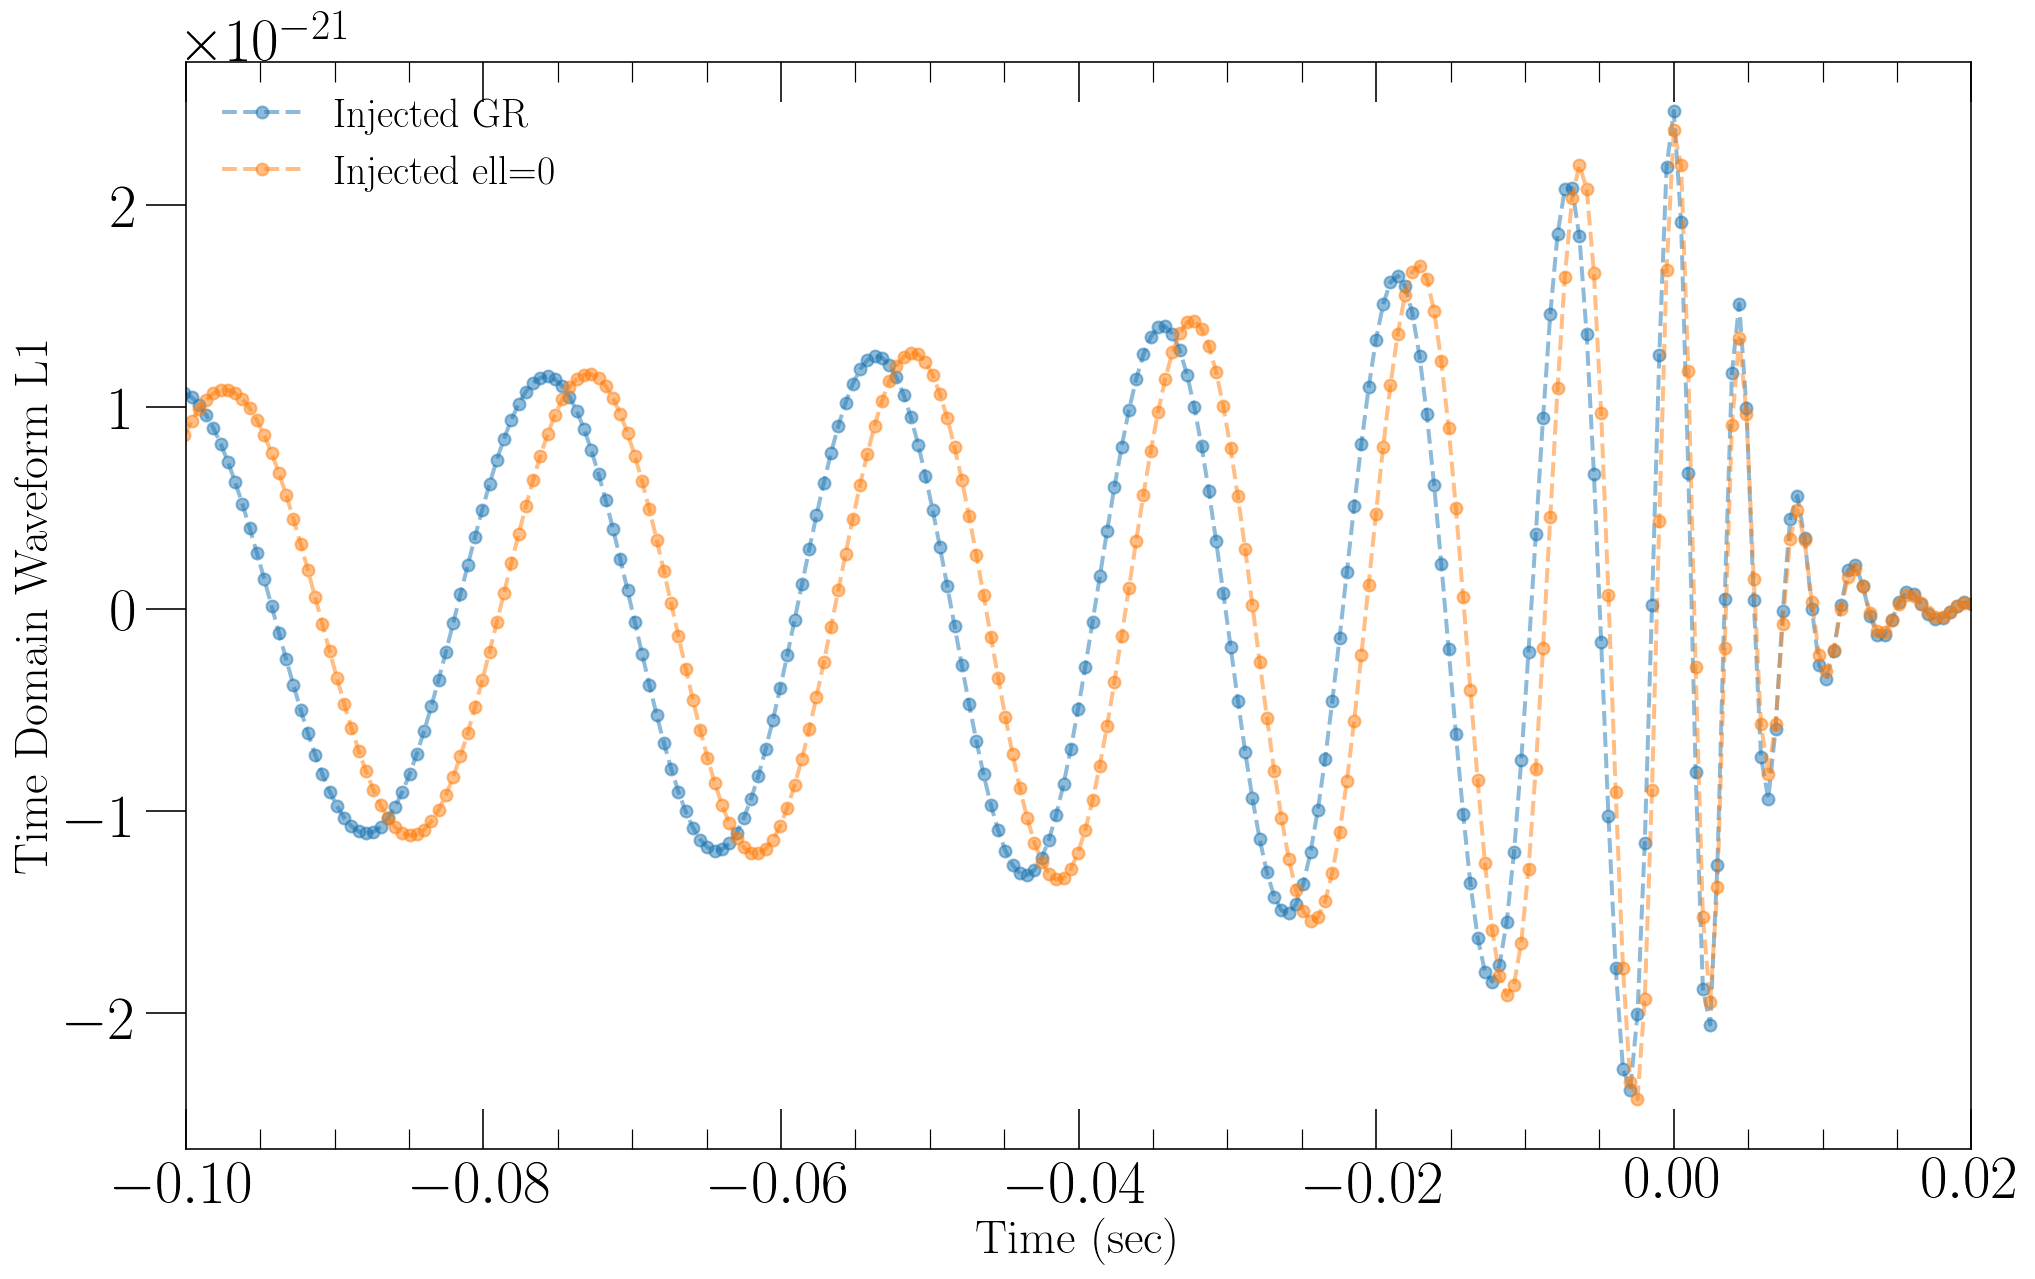

In [37]:
def GetPeakTime(time, data): 
    """ Grab the peak time of some data """
    t_peak = time[np.argmax(data)]
    return t_peak

def SubtractPeakTime(time, data): 
    """ Subtract the peak time of some data """
    t_peak = GetPeakTime(time, data)
    return time - t_peak

def GetInjectedData(f):
    
    data = np.loadtxt(f, comments="#",usecols=([0]),unpack=True)
    s_rate = 2048 # Hz
    dt = 1.0/s_rate
    time = np.array([dt * t for t in range(len(data))])
    
    time = SubtractPeakTime(time, data)
    return time, data
    
def PlotInjectedData():
    
    plt.figure(figsize=(16,10))
    
    f = "/home/maria.okounkova/BeyondGRAnalysis/Waveforms/PureGR/hwinjcbc_1197495358_PureGR_SNR_150_L1.txt"
    time, data = GetInjectedData(f)
    plt.plot(time, data, '--o', lw = 2.0, alpha=0.5, label='Injected GR')
    
    f = "/home/maria.okounkova/BeyondGRAnalysis/Waveforms/dCS_0p0/hwinjcbc_1197495358_dCS_0p0_SNR_150_L1.txt"
    time, data = GetInjectedData(f)
    plt.plot(time, data, '--o', lw = 2.0, alpha=0.5, label='Injected ell=0')
    
    plt.legend(frameon=False, fontsize=20)
    plt.xlim(-0.1, 0.02)
    plt.xlabel('Time (sec)')
    plt.ylabel('Time Domain Waveform L1')
    plt.show()

PlotInjectedData()

